### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [1]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.DataFrame(lista_alumnos, columns= ['Nombre', 'Edad', 'Altura'])

1. Crea un dataframe

In [4]:
df

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


2. Realiza un breve análisis exploratorio de los datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 632.0+ bytes


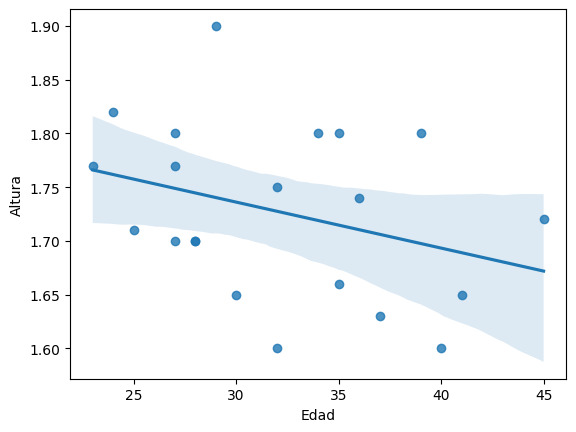

In [8]:
sns.regplot(data = df, x = 'Edad', y = 'Altura');

C:\Users\misla\AppData\Local\Temp\ipykernel_10180\2396016717.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True);


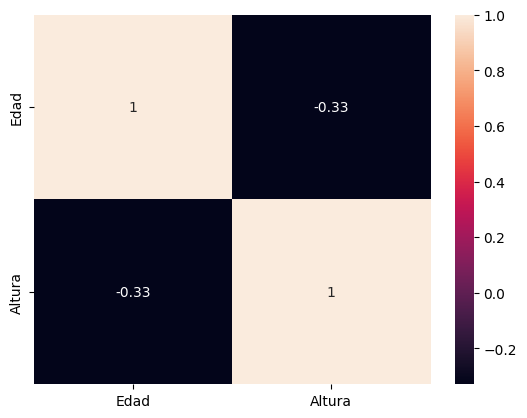

In [10]:
sns.heatmap(df.corr(), annot= True);

3. Divide el dataset para el entrenamiento

In [11]:
X = df[['Edad']]
Y = df['Altura']

In [12]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state= 30)

In [15]:
X.shape

(21, 1)

In [33]:
lr.predict([[50]])

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.6401908])

In [14]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_train shape: ', Y_train.shape)
print('Y_test shape: ', Y_test.shape)

X_train shape:  (16, 1)
X_test shape:  (5, 1)
Y_train shape:  (16,)
Y_test shape:  (5,)


4. Entrena tu modelo

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

5. Obtén predicciones con el test

In [19]:
predictions = lr.predict(X_test)

In [34]:
X_test['Altura'] = Y_test

In [35]:
X_test['Altura_pred'] = predictions

In [43]:
lr.predict([[200]])

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.98660932])

In [36]:
X_test

,Edad,Altura,Altura_pred
0,24,1.82,1.753478
17,34,1.80,1.709906
15,32,1.75,1.718621
1,25,1.71,1.749121
8,36,1.74,1.701192


In [27]:
predictions

array([1.75347826, 1.70990616, 1.71862058, 1.74912105, 1.70119174])

6. Evalúa tu modelo

In [37]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [48]:
predictions_train = lr.predict(X_train)

In [22]:
df['Altura']

0     1.82
1     1.71
2     1.66
3     1.63
4     1.90
5     1.80
6     1.70
7     1.60
8     1.74
9     1.72
10    1.65
11    1.65
12    1.60
13    1.80
14    1.77
15    1.75
16    1.70
17    1.80
18    1.77
19    1.70
20    1.80
Name: Altura, dtype: float64

In [49]:
mean_absolute_error(Y_train, predictions_train)

0.055235117162761235

In [47]:
mean_absolute_error(Y_test, predictions)

0.08201313731623405

In [26]:
lr.score(X_test, Y_test)

-1.0398087196617292

7. Representa tus predicciones en una gráfica.

In [56]:
Y_test

17    1.80
0     1.82
4     1.90
14    1.77
10    1.65
Name: Altura, dtype: float64

In [55]:
X_test

,Edad
17,34
0,24
4,29
14,23
10,41


In [53]:
predictions

array([1.75347826, 1.70990616, 1.71862058, 1.74912105, 1.70119174])

In [60]:
X_test

,Edad
17,34
0,24
4,29
14,23
10,41


In [61]:
Y_test

17    1.80
0     1.82
4     1.90
14    1.77
10    1.65
Name: Altura, dtype: float64

In [62]:
X_test

,Edad
17,34
0,24
4,29
14,23
10,41


In [64]:
pd.Series(predictions)

0    1.753478
1    1.709906
2    1.718621
3    1.749121
4    1.701192
dtype: float64

In [66]:
X_test

,Edad
17,34
0,24
4,29
14,23
10,41


In [67]:
pd.Series(predictions)

0    1.753478
1    1.709906
2    1.718621
3    1.749121
4    1.701192
dtype: float64

In [68]:
predictions = lr.predict(X_test)

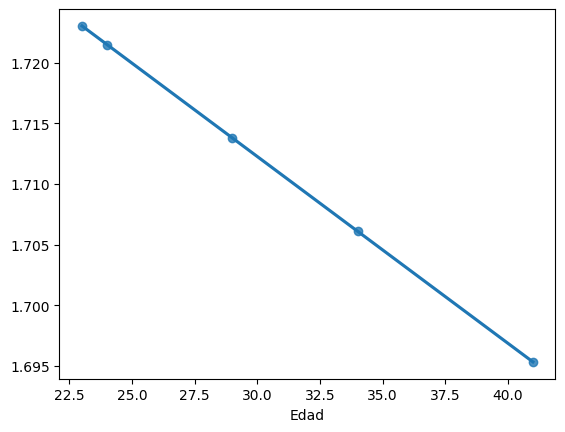

In [71]:
sns.regplot(x = X_test, y = predictions);

In [76]:
X_test['Edad']

array([34, 24, 29, 23, 41], dtype=int64)

In [73]:
Y_test

17    1.80
0     1.82
4     1.90
14    1.77
10    1.65
Name: Altura, dtype: float64

In [74]:
predictions

array([1.70610513, 1.72149462, 1.71379987, 1.72303357, 1.69533249])

In [79]:
pd.DataFrame({'1': Y_test, '2': predictions}).corr()

,1,2
1,1.000000,0.607039
2,0.607039,1.000000


In [82]:
X_test['Edad']

17    34
0     24
4     29
14    23
10    41
Name: Edad, dtype: int64

In [83]:
pd.DataFrame({'1': X_test['Edad'], '2': predictions}).corr()

,1,2
1,1.0,-1.0
2,-1.0,1.0


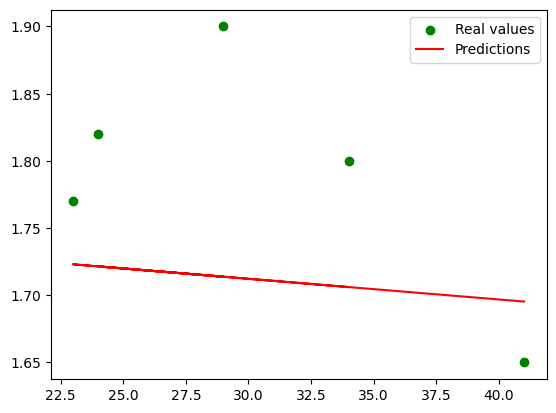

In [69]:
plt.scatter(X_test, Y_test, c = 'g', label = 'Real values')
plt.plot(X_test, pd.Series(predictions), c = 'r', label = 'Predictions')
plt.legend();